
### Naives bayes tester
This is were i will be testing how to make the naive bayes classifier, testing how I will be handling data.

### TOOLS

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
train_data = pd.read_csv("train_data.csv")
train_data = train_data.drop(["team_abbreviation_home", "team_abbreviation_away", "season_type", "away_wl_pre5", "home_wl_pre5"], axis=1)
train_data.head(10)

,label,min_avg5,fg_pct_home_avg5,fg3_pct_home_avg5,ft_pct_home_avg5,oreb_home_avg5,dreb_home_avg5,reb_home_avg5,ast_home_avg5,stl_home_avg5,...,ft_pct_away_avg5,oreb_away_avg5,dreb_away_avg5,reb_away_avg5,ast_away_avg5,stl_away_avg5,blk_away_avg5,tov_away_avg5,pf_away_avg5,pts_away_avg5
0,0,245.0,0.4396,0.3608,0.7494,14.6,37.2,51.8,28.2,9.2,...,0.8026,10.8,31.2,42.0,19.0,7.0,7.6,15.0,23.4,103.0
1,0,245.0,0.4488,0.3274,0.7092,10.2,40.4,50.6,23.6,5.4,...,0.8002,7.2,34.0,41.2,21.4,6.2,3.6,11.4,18.8,98.8
2,0,240.0,0.4732,0.3348,0.7056,11.4,30.6,42.0,26.2,9.2,...,0.7538,8.8,28.4,37.2,21.0,8.0,5.0,13.2,27.6,98.6
3,1,240.0,0.4518,0.3894,0.6450,14.6,33.0,47.6,24.2,8.0,...,0.8534,10.8,29.2,40.0,21.2,6.4,4.0,14.2,19.6,95.2
4,0,240.0,0.4460,0.2542,0.7544,16.6,31.8,48.4,22.4,3.8,...,0.7378,14.2,27.6,41.8,22.8,7.8,2.8,15.2,25.4,105.2
5,0,245.0,0.5044,0.4210,0.6394,8.0,28.2,36.2,20.2,7.2,...,0.7534,11.2,25.2,36.4,17.2,8.6,3.2,15.6,25.6,92.0
6,1,250.0,0.4294,0.2828,0.7910,12.6,32.4,45.0,21.8,6.0,...,0.6650,10.2,33.4,43.6,22.8,6.0,2.6,13.8,23.2,90.6
7,1,245.0,0.4682,0.3964,0.8354,14.8,28.4,43.2,21.8,6.6,...,0.8132,10.0,26.4,36.4,27.0,8.6,3.2,11.8,22.4,101.2
8,1,245.0,0.4600,0.3728,0.5754,8.8,37.2,46.0,26.6,8.4,...,0.8042,11.0,35.2,46.2,20.8,7.6,5.2,14.6,22.6,86.0
9,0,240.0,0.4864,0.3742,0.7542,11.4,31.2,42.6,24.6,10.4,...,0.6882,9.6,37.4,47.0,19.0,7.2,4.0,16.4,15.6,92.0


### Correlation heatmap
Gives a diagram of some of the attributes that might not be independent of each other

<Axes: >

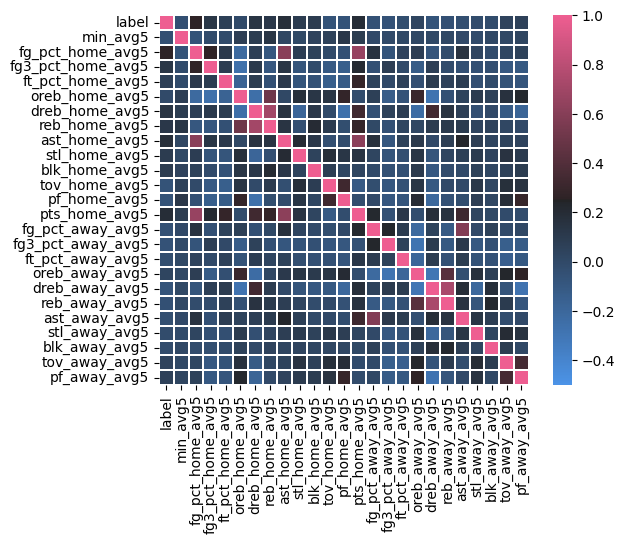

In [15]:
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [45]:
def calculate_prior(df, Y):
    # take a list of the possible classes, in this case it is 1 or 0
    classes = sorted(list(df[Y].unique()))
    prior = []

    # calculate the P(Y = y)
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior


In [46]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    # get the mean and standard deviation for the feature for the current label
    mean, std = df[feat_name].mean(), df[feat_name].std()
    
    # gaussian formula
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((feat_val - mean)**2 / (2 * std**2)))
    return p_x_given_y

In [47]:
def naive_bayes_gaussian(df, X, Y):
    #names of all columns except first
    features = list(df.columns)[1:]

    prior = calculate_prior(df, Y)

    Y_pred = []

    for x in X:
        #calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] += calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        #print(post_prob)
        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

In [48]:
validation_data = pd.read_csv("validation_data.csv")
validation_data = validation_data.drop(["team_abbreviation_home", "team_abbreviation_away", "season_type", "away_wl_pre5", "home_wl_pre5"], axis=1)
validation_data.head(10)

,label,min_avg5,fg_pct_home_avg5,fg3_pct_home_avg5,ft_pct_home_avg5,oreb_home_avg5,dreb_home_avg5,reb_home_avg5,ast_home_avg5,stl_home_avg5,...,ft_pct_away_avg5,oreb_away_avg5,dreb_away_avg5,reb_away_avg5,ast_away_avg5,stl_away_avg5,blk_away_avg5,tov_away_avg5,pf_away_avg5,pts_away_avg5
0,0,245.0,0.4330,0.3510,0.7334,11.6,31.2,42.8,20.2,4.6,...,0.6610,11.4,30.4,41.8,23.6,6.4,6.0,15.8,23.6,102.2
1,1,240.0,0.4782,0.3638,0.7736,10.2,34.4,44.6,26.6,6.4,...,0.7800,6.8,35.2,42.0,25.6,5.0,5.0,12.4,20.2,109.8
2,1,240.0,0.4924,0.3758,0.7500,12.4,33.8,46.2,23.2,8.6,...,0.7672,11.2,31.0,42.2,26.0,7.8,5.6,18.2,22.8,110.0
3,0,240.0,0.4482,0.3138,0.7922,7.0,33.2,40.2,23.0,6.6,...,0.6856,10.8,34.4,45.2,19.6,7.2,4.2,16.2,18.8,91.8
4,0,240.0,0.4666,0.1870,0.7154,20.6,30.8,51.4,30.0,8.2,...,0.8850,10.2,25.6,35.8,27.0,14.4,3.6,16.2,26.4,111.4
5,1,245.0,0.4338,0.3810,0.7020,14.2,32.0,46.2,22.6,6.6,...,0.5600,12.4,31.8,44.2,19.2,7.4,6.4,15.2,24.2,93.4
6,0,240.0,0.4196,0.3282,0.7636,11.8,35.8,47.6,23.4,4.2,...,0.7706,14.6,27.8,42.4,20.6,8.6,3.4,15.8,21.2,108.0
7,0,240.0,0.5130,0.3914,0.8540,8.8,33.2,42.0,21.6,8.6,...,0.7028,11.4,33.0,44.4,24.6,7.4,2.6,14.0,21.6,110.6
8,1,240.0,0.4620,0.3886,0.7318,11.8,31.6,43.4,24.6,5.2,...,0.6964,12.6,29.8,42.4,19.2,7.0,3.4,18.6,25.0,90.0
9,0,240.0,0.4562,0.4822,0.8110,11.0,28.6,39.6,28.2,6.2,...,0.8038,19.0,33.0,52.0,26.0,8.6,7.6,17.2,23.4,108.6


In [49]:
# extract relevant validation data
X_validation_data = validation_data.iloc[:, 1:].values
Y_validation_data = validation_data.iloc[:, 0].values
#print(X_validation_data[:10])
#print(Y_validation_data[:10])
#Y_validation_data

Y_pred = naive_bayes_gaussian(train_data, X=X_validation_data, Y="label")


# i think this imports will help me calc accuracy
from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_validation_data, Y_pred))
print(f1_score(Y_validation_data, Y_pred))

print(Y_pred[0:30])
print(Y_validation_data[0:30])

[[323 177]
 [195 305]]
0.6211812627291242
[0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0]
[0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0]
